Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
x_train.shape (60000, 28, 28)
y_train.shape (60000,)
x_test.shape (10000, 28, 28)
y_test.shape (10000,)
x_train.shape (60000, 32, 32)
y_train.shape (60000,)
x_test.shape (10000, 32, 32)
y_test.shape (10000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         295168    
_

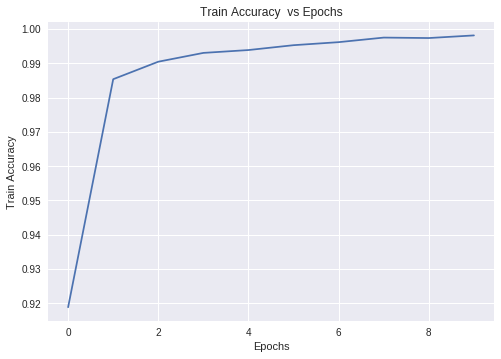

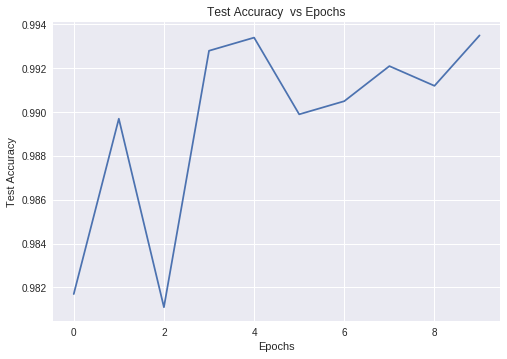

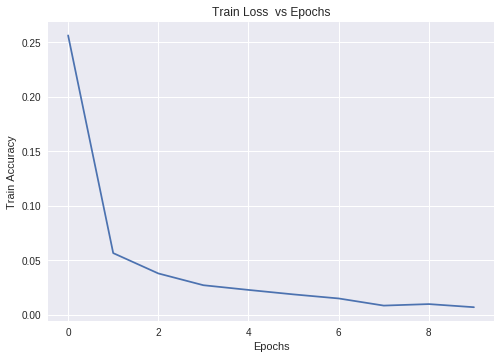

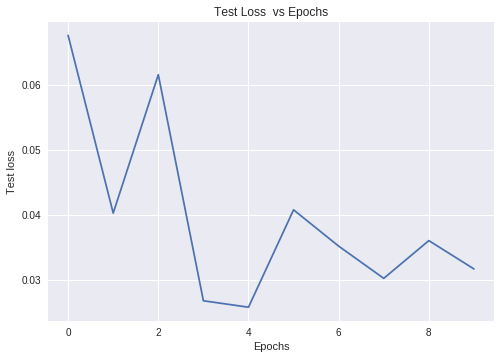

In [0]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D 
from keras.utils import np_utils
from keras.optimizers import SGD
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
import matplotlib.pyplot as plt

from PIL import Image
from PIL import ImageFilter

#Exercise1 question1
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train.shape", x_train.shape)
print("y_train.shape", y_train.shape)
print("x_test.shape", x_test.shape)
print("y_test.shape", y_test.shape)


x_train_new = []
x_test_new = []
for i in range(len(x_train)):
  newImageTrain= Image.fromarray(x_train[i])
  new_Image_Train = newImageTrain.resize((32,32), Image.HAMMING)
  train_array = new_Image_Train.convert('L')
  train_array = np.array(train_array)
  x_train_new.append(train_array)
  
for i in range(len(x_test)):
  newImageTest= Image.fromarray(x_test[i])
  new_Image_Test = newImageTest.resize((32,32), Image.HAMMING)
  test_array = new_Image_Test.convert('L')
  test_array = np.array(test_array)
  x_test_new.append(test_array)
  
  
x_train = np.array(x_train_new)
x_test = np.array(x_test_new)
print("x_train.shape", x_train.shape)
print("y_train.shape", y_train.shape)
print("x_test.shape", x_test.shape)
print("y_test.shape", y_test.shape)


img_rows = 32
img_cols = 32
if K.image_data_format() == 'channels_first':
	x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
	x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
	input_shape = (1, img_rows, img_cols)
else:
	x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
	x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
	input_shape = (img_rows, img_cols, 1)
  
  
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))


model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))


model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2))) 

model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(512, activation='relu'))

model.add(Dense(10, activation='softmax'))
print(model.summary())

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fits the model 
history = model.fit(x_train, y_train, batch_size=32, validation_data=(x_test,y_test), epochs=10, verbose=1)

score = model.evaluate(x_test, y_test, batch_size=32)

print("The score for test set is", score)
print(history.history.keys())


##Exercise 1 question 2

plt.plot(history.history['acc'])
plt.title('Train Accuracy  vs Epochs')
plt.ylabel('Train Accuracy')
plt.xlabel('Epochs')
plt.show()

plt.plot(history.history['val_acc'])
plt.title('Test Accuracy  vs Epochs')
plt.ylabel('Test Accuracy')
plt.xlabel('Epochs')
plt.show()

plt.plot(history.history['loss'])
plt.title('Train Loss  vs Epochs')
plt.ylabel('Train Accuracy')
plt.xlabel('Epochs')
plt.show()

plt.plot(history.history['val_loss'])
plt.title('Test Loss  vs Epochs')
plt.ylabel('Test loss')
plt.xlabel('Epochs')
plt.show()
